In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

Step 1: Load the dataset

In [7]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data"
columns = ["age", "sex", "cp", "trestbps", "chol", "fbs", "restecg", "thalach", "exang", 
           "oldpeak", "slope", "ca", "thal", "target"]

# Load data
data = pd.read_csv(url, header=None, names=columns, na_values="?")

# Drop rows with missing values
data = data.dropna()

# Target encoding: 0 (no disease), 1-4 (disease present)
data['target'] = data['target'].apply(lambda x: 1 if x > 0 else 0)

Step 2: Apply thresholds

In [12]:
# Use .apply along rows (axis=1) to combine conditions from multiple columns
data['age_high_risk'] = data.apply(
    lambda row: 1 if (row['age'] > 45 and row['sex'] == 1) or (row['age'] > 55 and row['sex'] == 0) else 0, axis=1
)
data['chol_high'] = data['chol'].apply(lambda x: 1 if x >= 200 else 0)
data['bp_high'] = data['trestbps'].apply(lambda x: 1 if x >= 130 else 0)
data['thalach_low'] = data['thalach'].apply(lambda x: 1 if x < 150 else 0)
data['exang_positive'] = data['exang']  # Already binary, no transformation needed
data['oldpeak_high'] = data['oldpeak'].apply(lambda x: 1 if x > 1.0 else 0)
data['ca_high'] = data['ca'].apply(lambda x: 1 if x >= 1 else 0)
data['thal_risk'] = data['thal'].apply(lambda x: 1 if x in [6, 7] else 0)

# Drop original columns that are replaced by thresholds
X = data[['age_high_risk', 'chol_high', 'bp_high', 'thalach_low', 
          'exang_positive', 'oldpeak_high', 'ca_high', 'thal_risk']]
y = data['target']


Step 3: Preprocess the data

In [15]:
# Standardize the features (if required for logistic regression)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

Step 4: Train Logistic Regression model

In [22]:
model = LogisticRegression()  
model.fit(X_train, y_train)

LogisticRegression()

Step 5: Predictions and threshold for risk levels

In [25]:
threshold = 0.5
y_pred_prob = model.predict_proba(X_test)[:, 1]
y_pred = (y_pred_prob >= threshold).astype(int)

# Define risk levels based on probability
def risk_level(prob):
    if prob < 0.4:
        return "Low Risk"
    elif 0.4 <= prob < 0.7:
        return "Moderate Risk"
    else:
        return "High Risk"

# Prepare final results DataFrame
results = pd.DataFrame({
    'Probability': y_pred_prob,
    'Heart Disease': ["Found" if pred else "Not Found" for pred in y_pred],
    'Risk Level': [risk_level(prob) for prob in y_pred_prob]
})

Step 6: Evaluate and display results

In [28]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nSample Predictions:")
print(results.head(10))

Accuracy: 0.85

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.89      0.88        36
           1       0.83      0.79      0.81        24

    accuracy                           0.85        60
   macro avg       0.85      0.84      0.84        60
weighted avg       0.85      0.85      0.85        60


Sample Predictions:
   Probability Heart Disease     Risk Level
0     0.075987     Not Found       Low Risk
1     0.380808     Not Found       Low Risk
2     0.050772     Not Found       Low Risk
3     0.702196         Found      High Risk
4     0.079641     Not Found       Low Risk
5     0.559455         Found  Moderate Risk
6     0.440573     Not Found  Moderate Risk
7     0.732652         Found      High Risk
8     0.761868         Found      High Risk
9     0.253683     Not Found       Low Risk


In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc, precision_recall_curve

Step 6: Evaluate and display results

Accuracy: 0.85

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.89      0.88        36
           1       0.83      0.79      0.81        24

    accuracy                           0.85        60
   macro avg       0.85      0.84      0.84        60
weighted avg       0.85      0.85      0.85        60



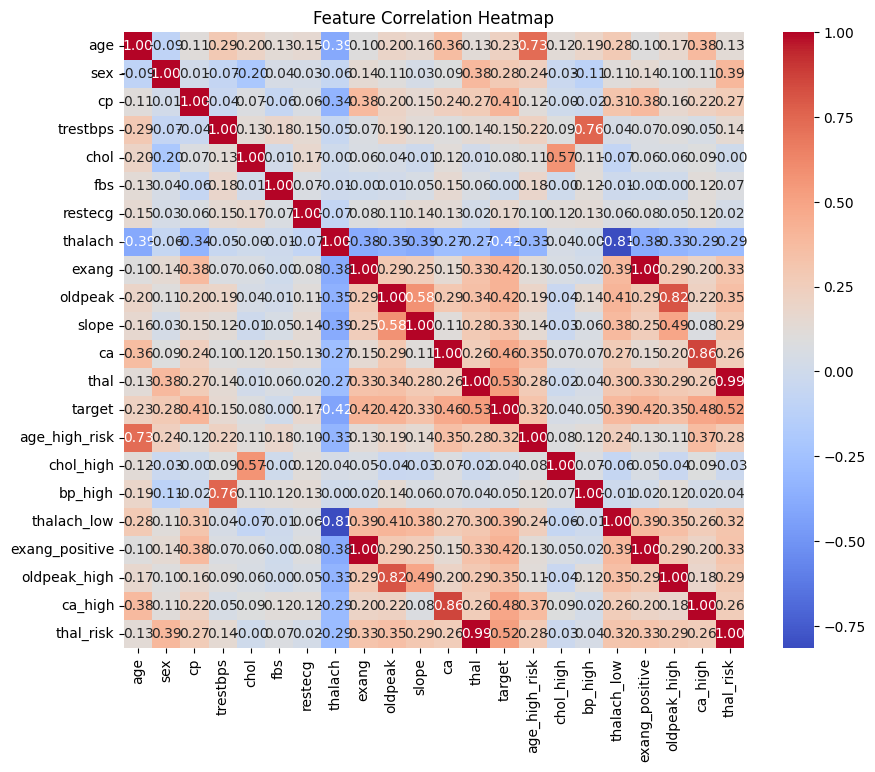

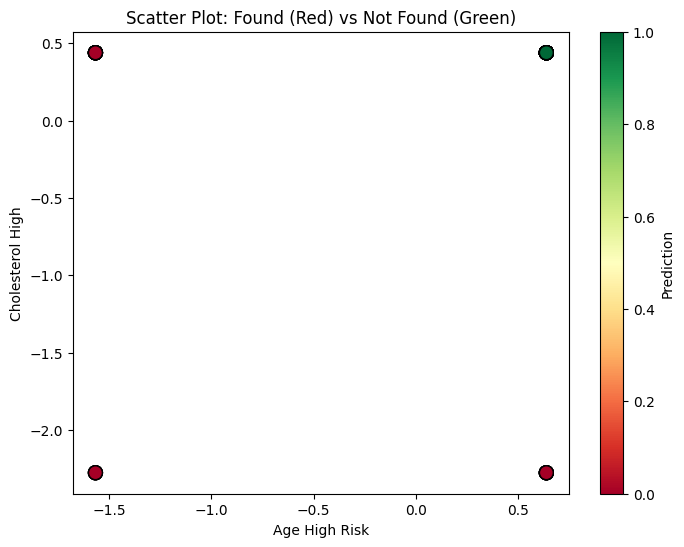

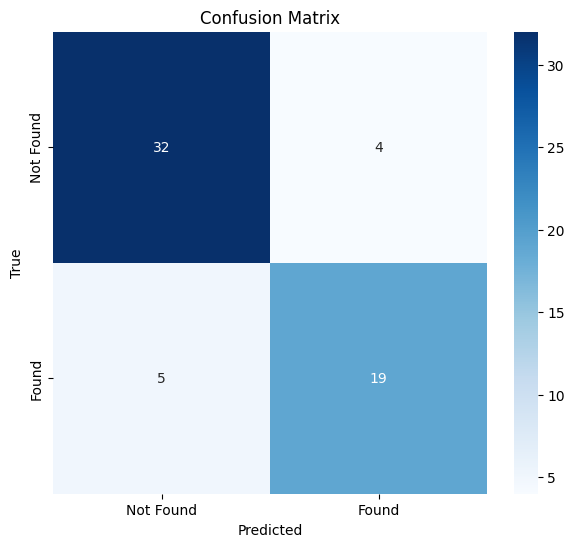

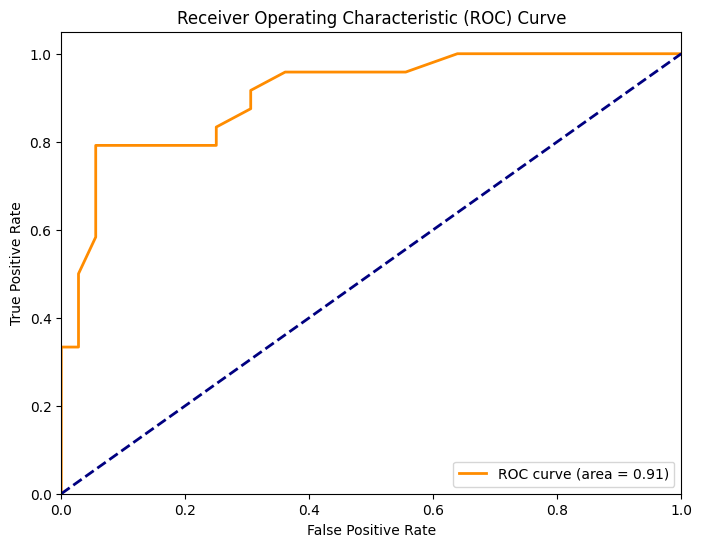

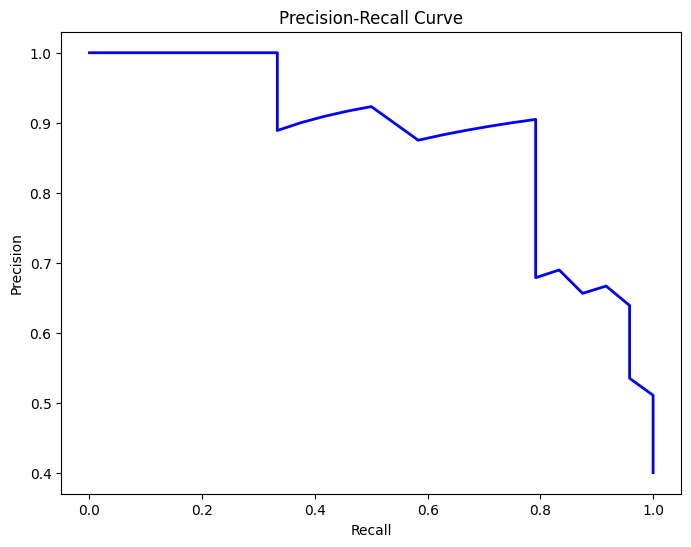


Sample Predictions:
    Probability Heart Disease     Risk Level
0      0.075987     Not Found       Low Risk
1      0.380808     Not Found       Low Risk
2      0.050772     Not Found       Low Risk
3      0.702196         Found      High Risk
4      0.079641     Not Found       Low Risk
5      0.559455         Found  Moderate Risk
6      0.440573     Not Found  Moderate Risk
7      0.732652         Found      High Risk
8      0.761868         Found      High Risk
9      0.253683     Not Found       Low Risk
10     0.306776     Not Found       Low Risk
11     0.090341     Not Found       Low Risk
12     0.049429     Not Found       Low Risk
13     0.380808     Not Found       Low Risk
14     0.413779     Not Found  Moderate Risk
15     0.044529     Not Found       Low Risk
16     0.306776     Not Found       Low Risk
17     0.306776     Not Found       Low Risk
18     0.901523         Found      High Risk
19     0.380808     Not Found       Low Risk
20     0.732652         Found     

In [35]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Prepare final results DataFrame for visualization
results = pd.DataFrame({
    'Probability': y_pred_prob,
    'Heart Disease': ["Found" if pred else "Not Found" for pred in y_pred],
    'Risk Level': [("Low Risk" if prob < 0.4 else "Moderate Risk" if 0.4 <= prob < 0.7 else "High Risk") for prob in y_pred_prob]
})

# 1. Correlation Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap="coolwarm", fmt='.2f')
plt.title('Feature Correlation Heatmap')
plt.show()

# 2. Scatter Plot (Found=Red, Not Found=Green)
plt.figure(figsize=(8, 6))
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_pred, cmap=plt.cm.RdYlGn, edgecolors='k', s=100)
plt.title('Scatter Plot: Found (Red) vs Not Found (Green)')
plt.xlabel('Age High Risk')
plt.ylabel('Cholesterol High')
plt.colorbar(label='Prediction')
plt.show()

# 3. Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(7, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Found', 'Found'], yticklabels=['Not Found', 'Found'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# 4. ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# 5. Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_test, y_pred_prob)
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='blue', lw=2)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()

# Sample Predictions
print("\nSample Predictions:")
print(results)